In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"

In [3]:
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 dikolom x ada:", x)
print("Nilai 0 dikolom y ada:", y)
print("Nilai 0 dikolom z ada:", z)

Nilai 0 dikolom x ada: 8
Nilai 0 dikolom y ada: 7
Nilai 0 dikolom z ada: 20


In [7]:
diamonds.loc[(diamonds['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
diamonds = diamonds.loc[(diamonds[['x', 'y', 'z']] != 0).all(axis=1)]

diamonds.shape

(53920, 10)

In [9]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Mengamati outliers

### 1. Carat

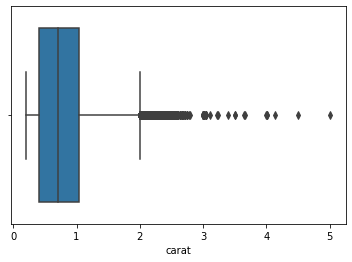

In [10]:
sns.boxplot(x=diamonds['carat'])

### 2. Table

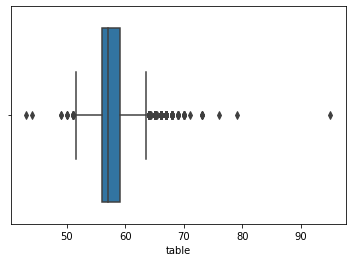

In [11]:
sns.boxplot(x=diamonds['table'])

### 3. X

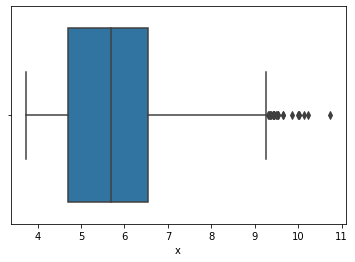

In [12]:
sns.boxplot(x=diamonds['x'])

In [13]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR = Q3 - Q1
diamonds = diamonds[~((diamonds < (Q1 - 1.5 * IQR)) | (diamonds > (Q3 + 1.5*IQR))).any(axis=1)]

In [14]:
diamonds.shape

(47524, 10)

## Data Preparation

### Encoding Categorical Feature

In [15]:
from sklearn.preprocessing import OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)
diamonds.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


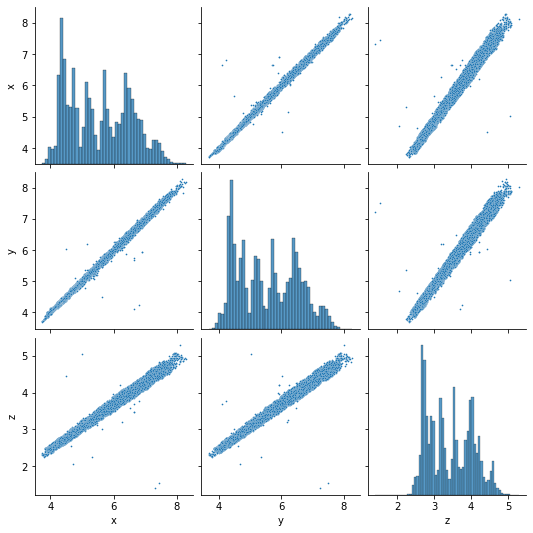

In [16]:
sns.pairplot(diamonds[['x', 'y', 'z']], plot_kws={'s':3})

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x', 'y', 'z']])
princ_comp = pca.transform(diamonds[['x', 'y', 'z']])

In [18]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x', 'y', 'z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x', 'y', 'z')]).flatten()
diamonds.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [20]:
diamonds

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,61.5,55.0,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,59.8,61.0,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,62.4,58.0,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-2.048530
4,0.31,63.3,58.0,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-1.831975
5,0.24,62.8,57.0,336,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-2.451982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.295534
53936,0.72,63.1,55.0,2757,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.294127
53937,0.70,62.8,60.0,2757,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.209390
53938,0.86,61.0,58.0,2757,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.884149


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [22]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


## StandarScaler

In [23]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [24]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


## Model Development

### K-Nearest Neighbor

In [25]:
!ls

sample_data


.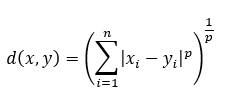

In [26]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [51]:
mean_squared_error(y_pred_knn, y_true)

299154.2384054616

## Random Forest

It built from decision tree that combined into one big things

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=50, max_depth=16, 
                                 random_state=55, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [31]:
y_pred_rf = rf_model.predict(X_train)

In [32]:
y_pred_rf

array([2675.04954414, 9173.12310224, 1681.84955866, ..., 7933.74400762,
        890.36328813, 6811.85315212])

In [33]:
y_true = y_train

In [34]:
y_true

536      2827
21293    9449
45577    1689
37379     982
38240    1018
         ... 
8504     4423
16595    6628
19079    7850
33394     828
16962    6774
Name: price, Length: 42771, dtype: int64

In [36]:
mean_squared_error(y_pred_rf, y_true)

57419.06228393561

## AdaBoosting

In [38]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=21)
boosting.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=50, random_state=21)

In [48]:
y_pred_boost = boosting.predict(X_train)

In [49]:
y_true = y_train

In [50]:
mean_squared_error(y_pred_boost, y_true)

905656.3496228481

## Scaling

In [45]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [46]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

In [47]:
mse

,train,test
KNN,NaN,NaN
RF,NaN,NaN
Boosting,NaN,NaN


In [55]:
model_dict = {'KNN': knn, 'RF': rf_model, 'Boosting': boosting}

In [56]:
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, 
                                              y_pred=model.predict(X_train)) /1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, 
                                             y_pred=model.predict(X_test)) /1e3

In [57]:
mse

,train,test
KNN,299.154,323.131
RF,57.4191,146.4
Boosting,905.656,843.825


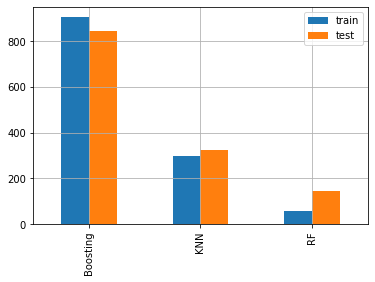

In [60]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=1)
ax.grid(zorder=0)

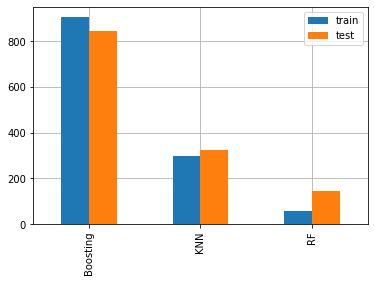

In [61]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

In [62]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {"y_true": y_test[:1]}

for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,917.7,887.3,787.8


All this resource collected from DICODING